# Installing Dependencies

In [8]:
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
%pip list

Package                      Version
---------------------------- ----------
absl-py                      2.0.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.2
certifi                      2023.11.17
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.0
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
exceptiongroup               1.2.0
executing                    2.0.1
flatbuffers                  23.5.26
fonttools                    4.47.0
gast                         0.5.4
google-auth                  2.25.2
google-auth-oauthlib         1.2.0
google-pasta                 0.2.0
grpcio                       1.60.0
h5py                         3.10.0
idna                         3.6
ipykernel                    6.28.0
ipython                      8.19.0
jedi                         0.19.1



[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
import os

### Cleaning Data

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'data'
exts = ['jpeg','jpg','bmp','png']

In [5]:
for image in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir,image)):
        path = os.path.join(data_dir,image,img)
        try:
            tip = imghdr.what(path)
            if tip not in exts:
                print("Img doesnt exist")
                os.remove(path)
        except:
            print("Exception") 

## Load Data

In [6]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [32]:
data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 756 files belonging to 2 classes.


In [43]:
total_count = 0

for batch in data:
    images, labels = batch
    total_count += images.shape[0]

total_count

756

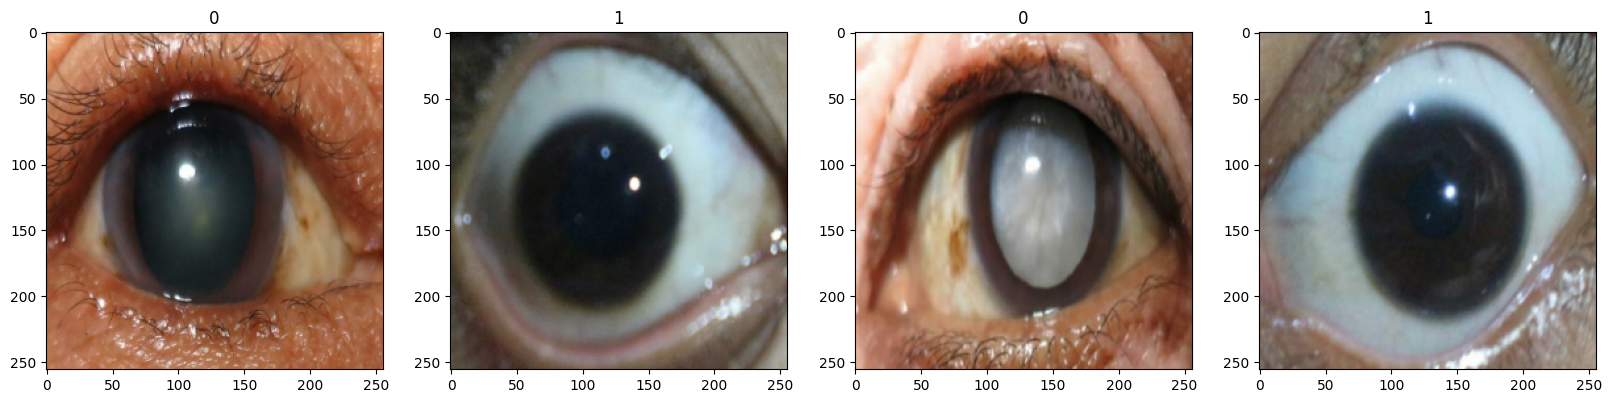

In [9]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 0 immature
# 1 normal

# Preprocess Data

In [10]:
data = data.map(lambda x,y:(x/255,y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()

1.0

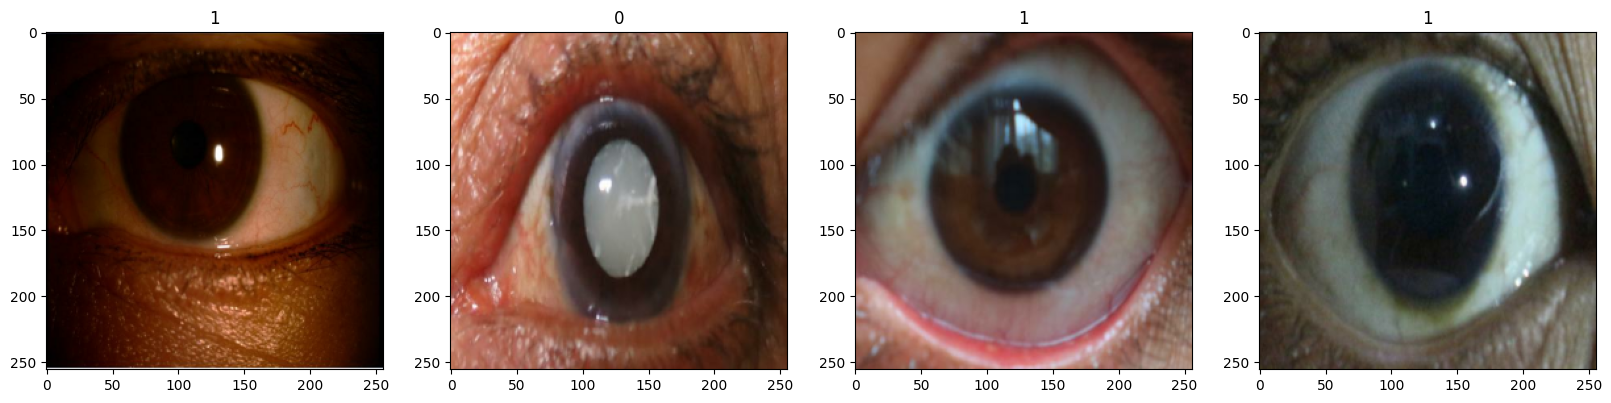

In [11]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [12]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [13]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Learning

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        

In [18]:
logdir='logs'
tensoboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [19]:
history = model.fit(train,epochs=25,validation_data=val,callbacks=[tensoboard_callback])

Epoch 1/25


16/16 [==============================] - 8s 327ms/step - loss: 0.6131 - accuracy: 0.7129 - val_loss: 0.2739 - val_accuracy: 0.9375
Epoch 2/25
16/16 [==============================] - 5s 289ms/step - loss: 0.2411 - accuracy: 0.9102 - val_loss: 0.1852 - val_accuracy: 0.9453
Epoch 3/25
16/16 [==============================] - 5s 311ms/step - loss: 0.1376 - accuracy: 0.9375 - val_loss: 0.1586 - val_accuracy: 0.9297
Epoch 4/25
16/16 [==============================] - 5s 298ms/step - loss: 0.0951 - accuracy: 0.9688 - val_loss: 0.0812 - val_accuracy: 0.9688
Epoch 5/25
16/16 [==============================] - 5s 323ms/step - loss: 0.0387 - accuracy: 0.9883 - val_loss: 0.0483 - val_accuracy: 0.9844
Epoch 6/25
16/16 [==============================] - 6s 328ms/step - loss: 0.0422 - accuracy: 0.9824 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 7/25
16/16 [==============================] - 6s 345ms/step - loss: 0.0310 - accuracy: 0.9922 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoc

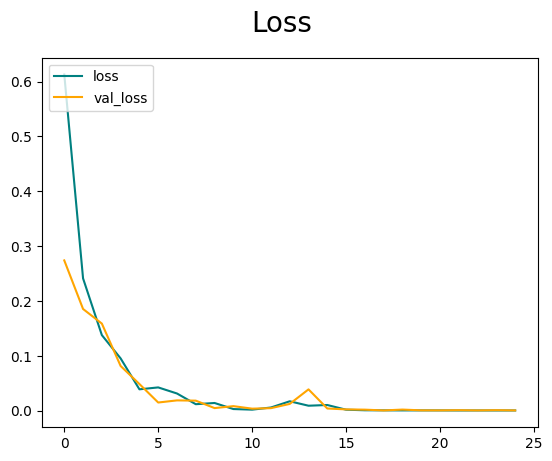

In [22]:
fig2 = plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig2.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

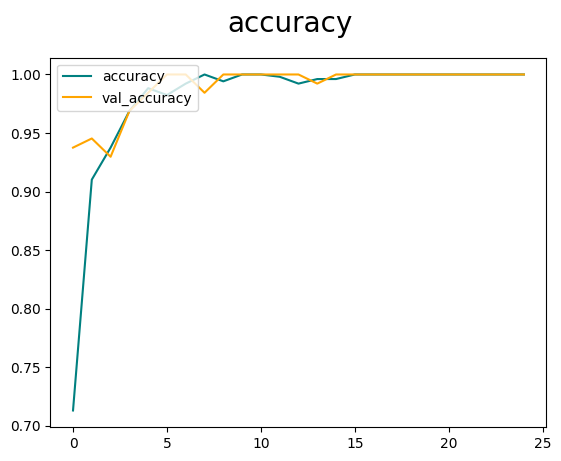

In [21]:
fig2 = plt.figure()
plt.plot(history.history['accuracy'],color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='val_accuracy')
fig2.suptitle('accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Evaluation

In [23]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [24]:
prec = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [25]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    prec.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 95ms/step


In [26]:
print(f'Precision:{prec.result().numpy()}, Recall:{rec.result().numpy()}, Accuray:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuray:1.0


In [46]:

precision = prec.result().numpy()
recall = rec.result().numpy()
accuracy = acc.result().numpy()
TP = (total_count * (1 - accuracy)) / (1 / precision + 1 / recall - 1)

FP = TP * (1 / precision - 1)
FN = TP * (1 / recall - 1)
TN = total_count * accuracy - TP

confusion_matrix = np.array([[TP, FP],
                             [FN, TN]])

confusion_matrix

array([[  0.,   0.],
       [  0., 756.]])

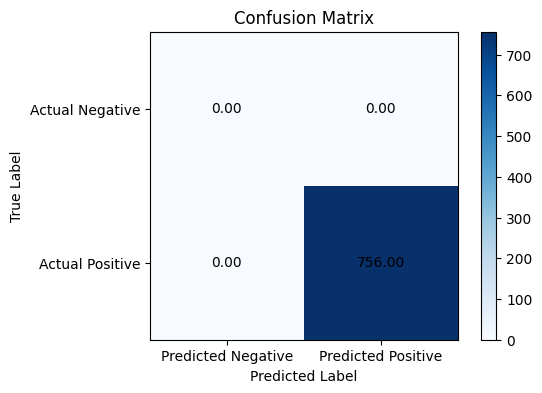

In [47]:
plt.figure(figsize=(6, 4))
plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()

for i in range(2):
    for j in range(2):
        plt.text(j, i, f'{confusion_matrix[i, j]:.2f}', horizontalalignment='center', verticalalignment='center')

plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [27]:
import cv2

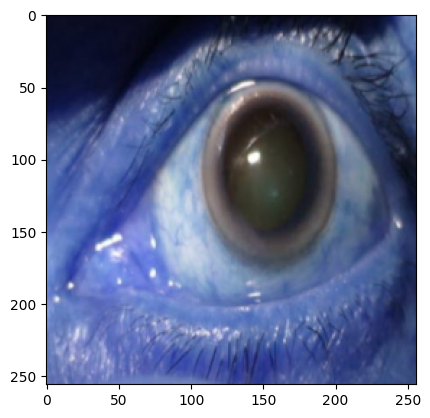

1/1 [==============================] - 0s 136ms/step
[[1.1581143e-08]]
Cataract


In [28]:
img = cv2.imread('./test/5_jpg.rf.be52fb8fbd9fa8493c94018e1d809e7c.jpg')
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255,0))
print(yhat)
if yhat > 0.5 :
    print("Normal")
else:
    print("Cataract")

In [34]:
yhat = model.predict(np.expand_dims(resize/255,0))
print(yhat)
if yhat > 0.5 :
    print("Normal")
else:
    print("Cataract")

1/1 [==============================] - 0s 20ms/step
[[1.]]
Normal


# Saving Model

In [75]:
from tensorflow.keras.models import load_model

In [76]:
model.save(os.path.join('models','v2model.h5'))

d:\Tensorflow\clasification\clenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [77]:
new = load_model(os.path.join('models','v2model.h5'))

In [78]:
yhat = new.predict(np.expand_dims(resize/255,0))
print(yhat)
if yhat > 0.5 :
    print("Normal")
else:
    print("Cataract")

1/1 [==============================] - 0s 152ms/step
[[0.99933094]]
Normal
